In [60]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [68]:
# Setting up Tweepy Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

analyzer = SentimentIntensityAnalyzer()
targets = ['@BBCWorld', '@CNN', '@CBSNews', '@FoxNews', '@NYTimes']

tweets = []

for user in targets:
    counter = 1
    public_tweets = api.user_timeline(user, count = 100)
    for tweet in public_tweets:
        tweets.append({
            "User" : user,
            "Compound Score" : analyzer.polarity_scores(tweet['text'])["compound"],
            "Positive Score" : analyzer.polarity_scores(tweet['text'])["pos"], 
            "Neutral Score" : analyzer.polarity_scores(tweet['text'])["neu"],
            "Negative Score" : analyzer.polarity_scores(tweet['text'])["neg"],       
            "Text" : tweet['text'],
            "Tweets Ago": counter,
        })
        counter += 1

tweets_df = pd.DataFrame.from_dict(tweets)
tweets_df.head()

,Compound Score,Negative Score,Neutral Score,Positive Score,Text,Tweets Ago,User
0,-0.2500,0.258,0.565,0.177,China's telco giant ZTE sees shares collapse 3...,1,@BBCWorld
1,0.0000,0.000,1.000,0.000,Ten-year old Hermes Birkin handbag sells for £...,2,@BBCWorld
2,0.0000,0.000,1.000,0.000,RT @SallyBundockBBC: What is your take on the ...,3,@BBCWorld
3,0.0000,0.000,1.000,0.000,Hidden writing in ancient desert monastery man...,4,@BBCWorld
4,-0.5423,0.360,0.640,0.000,Letter from Africa: Why has Nigeria rejected p...,5,@BBCWorld


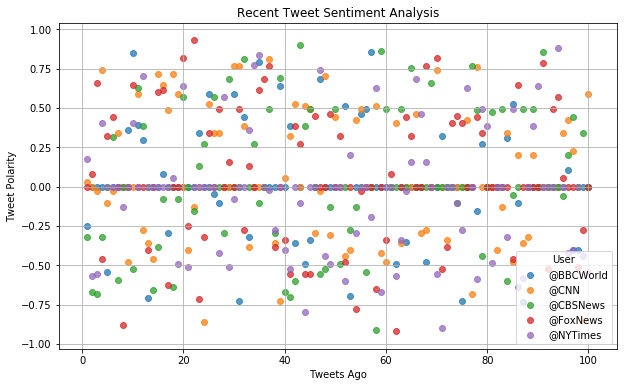

In [100]:
plt.figure(figsize=(10,6))
for target in targets:
    specific = tweets_df.loc[tweets_df["User"] == target]
    plt.scatter(specific['Tweets Ago'], specific['Compound Score'], alpha=0.75, label = target)


plt.title("Recent Tweet Sentiment Analysis")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.legend(title="User")
plt.grid()

In [109]:
new_df = tweets_df.groupby('User')
test = pd.DataFrame(new_df['Compound Score'].mean())

plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])


NameError: name 'x_axis' is not defined